In [1]:
import requests
from bs4 import BeautifulSoup
import io
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from docxtpl import DocxTemplate, InlineImage
from docx.shared import Mm

from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

from epiweeks import Week, Year
import seaborn as sns
import os
import statistics


In [2]:
# target url
url = 'https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8'

# Faz a requisição da página HTML da URL
reqs = requests.get(url)

# Adiciona o texto HTML na variável html
html = BeautifulSoup(reqs.text, 'html.parser')
  
# Cria uma função para pegar todos os links da página
def extractlinks(html):
    soup = BeautifulSoup(html)
    anchors = soup.findAll('a')
    links = []
    for a in anchors:
        links.append(a['href'])
    return links

# Cria uma lista com todas as URLs da página
urls = extractlinks(str(html))

for x in range(len(urls)):
    if 'DF' in urls[x]:
        url_df = urls[x]
url_df

'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-11-15/uf%3DDF/part-00000-a4c72902-144b-4930-873e-807bf2a847bb.c000.csv'

In [50]:
df = pd.read_csv(url_df, sep=';',error_bad_lines=False,  parse_dates=[0], dayfirst=True)

In [5]:
ubs = pd.read_csv('ubs.csv')

In [6]:
doc = DocxTemplate('boletim.docx')

# Crias a coluna de Região Administrativa RA

In [7]:
ubs_correta = ['UNIDADE BASICA DE SAUDE 1 ASA SUL',
 'UNIDADE BASICA DE SAUDE 4 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 1 PARANOA',
 'UNIDADE BASICA DE SAUDE 1 ESTRUTURAL',
 'UNIDADE BASICA DE SAUDE 2 ASA NORTE',
 'UNIDADE BASICA DE SAUDE 3 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 1 NUCLEO BANDEIRANTE',
 'UNIDADE BASICA DE SAUDE 1 CANDANGOLANDIA',
 'UNIDADE BASICA DE SAUDE 7 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 5 TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 5 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 9 CEILANDIA',
 'HOSPITAL MILITAR DE AREA DE BRASILIA',
 'UNIDADE BASICA DE SAUDE 4 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 3 TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 17 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 10 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 1 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE 2 SOBRADINHO II',
 'UNIDADE BASICA DE SAUDE 1 GAMA',
 'UNIDADE BASICA DE SAUDE 4 GAMA',
 'UNIDADE BASICA DE SAUDE 3 GUARA',
 'UNIDADE BASICA DE SAUDE 2 GAMA',
 'UNIDADE BASICA DE SAUDE 2 RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 2 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 1 BRAZLANDIA',
 'UNIDADE BASICA DE SAUDE 1 SOBRADINHO II',
 'UNIDADE BASICA DE SAUDE 1 AGUAS CLARAS',
 'HOSPITAL REGIONAL DE CEILANDIA',
 'UNIDADE BASICA DE SAUDE 2 GUARA',
 'UNIDADE BASICA DE SAUDE 1 ITAPOA',
 'UNIDADE BASICA DE SAUDE 2 CRUZEIRO',
 'UNIDADE BASICA DE SAUDE 1 LAGO NORTE',
 'FUNDACAO UNIVERSIDADE DE BRASILIA',
 'UNIDADE BASICA DE SAUDE 6 GAMA',
 'UNIDADE BASICA DE SAUDE 12 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 1 VICENTE PIRES',
 'UNIDADE BASICA DE SAUDE 3 ITAPOA',
 'UNIDADE BASICA DE SAUDE 7 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 2 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 20 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 1 GUARA',
 'UNIDADE BASICA DE SAUDE 1 RIACHO FUNDO I',
 'UNIDADE BASICA DE SAUDE 4 GUARA',
 'UNIDADE BASICA DE SAUDE 1 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 2 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 5 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 3 ASA NORTE',
 'UNIDADE BASICA DE SAUDE 5 GAMA',
 'UNIDADE BASICA DE SAUDE 3 GAMA',
 'UNIDADE BASICA DE SAUDE 3 RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 1 TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 1 ASA NORTE',
 'UNIDADE BASICA DE SAUDE 2 RIACHO FUNDO II',
 'GERENCIA DE SERVICOS DE ATENCAO SECUNDARIA 3',
 'UNIDADE BASICA DE SAUDE 1 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 3 PARANOA PARQUE',
 'UNIDADE BASICA DE SAUDE 5 PARANOA',
 'UNIDADE BASICA DE SAUDE 1 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 7 PARANOA',
 'UNIDADE BASICA DE SAUDE 3 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE 7 GAMA',
 'UNIDADE BASICA DE SAUDE 4 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 12 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 6 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 1 CRUZEIRO',
 'COMANDO DA AERONAUTICA',
 'HOSPITAL REGIONAL DE TAGUATINGA',
 'HOSPITAL DAS FORCAS ARMADAS',
 'UNIDADE BASICA DE SAUDE 9 SAO SEBASTIAO',
 'FUNDACAO HOSPITALAR DO DISTRITO FEDERAL',
 'UNIDADE BASICA DE SAUDE 11 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 5 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 1 FERCAL',
 'UNIDADE BASICA DE SAUDE 1 RIACHO FUNDO II',
 'DISTRITO FEDERAL SECRETARIA DE SAUDE',
 'UNIDADE BASICA DE SAUDE 8 RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 16 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 2 ESTRUTURAL',
 'HOSPITAL DE BASE DO DISTRITO FEDERAL',
 'UNIDADE BASICA DE SAUDE 2 SAMAMBAIA',
 'HOSPITAL REGIONAL DE SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 2 BRAZLANDIA',
 'HOSPITAL REGIONAL DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 1 VARJAO',
 'UNIDADE BASICA DE SAUDE 13 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 8 CEILANDIA',
 'HOSPITAL REGIONAL DE BRAZLANDIA',
 'UNIDADE BASICA DE SAUDE 7 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 1 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 4 RECANTO DAS EMAS',
 'HOSPITAL REGIONAL DE PLANALTINA',
 'COMANDO DA MARINHA',
 'UNIDADE BASICA DE SAUDE 8 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 6 DE TAGUATINGA',
 'HOSPITAL REGIONAL DE SOBRADINHO',
 'UNIDADE BASICA DE SAUDE 12 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 3 SAO SEBASTIAO',
 'HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA',
 'UNIDADE BASICA DE SAUDE 8 PARANOA',
 'HOSPITAL DA REGIAO LESTE',
 'UNIDADE BASICA DE SAUDE 6 PARANOA',
 'UNIDADE BASICA DE SAUDE 2 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 15 PLANALTINA',
 'UNIDA DE BASICA DE SAUDE 6 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 14 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 1 RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 4 PARANOA',
 'UNIDADE BASICA DE SAUDE 2 NUCLEO BANDEIRANTE',
 'UNIDADE BASICA DE SAUDE 14 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 10 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 11 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 8 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 7 TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 17 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 1 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 11 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE 2 TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 5 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 4 BRAZLANDIA',
 'DEMARTAMENTO MEDICO CAMARA DOS DEPUTADOS',
 'UNIDADE BASICA DE SAUDE 8 CAVAS DE BAIXO SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 10 RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 11 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 5 RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 1 PARK WAY',
 'UNIDADE BASICA DE SAUDE 12 PONTE ALTA GAMA',
 'UNIDADE BASICA DE SAUDE 3 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 5 ASA NORTE',
 'UNIDADE BASICA DE SAUDE 2 RIACHO FUNDO I',
 'UNIDADE BASICA DE SAUDE 19 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 8 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 9 ENGENHO DAS LAGES GAMA',
 'UNIDADE BASICA DE SAUDE 10 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 15 PFDF GAMA',
 'UNIDADE BASICA DE SAUDE 16 PLANALTINA',
 'UNIDADE BASICA DE SAUDE 2 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE 5 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE 5 SOBRADINHO II',
 'UNIDADE BASICA DE SAUDE 10 SAO SEBASTIAO',
 'UNIDADE BAISCA DE SAUDE N 1 SIA',
 'UNIDADE BASICA DE SAUDE 3 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 6 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 2 FERCAL',
 'UNIDADE BASICA DE SAUDE 16 ATP GAMA',
 'UNIDADE BASICA DE SAUDE 12 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 2 AGUAS CLARAS',
 'UNIDADE BASICA DE SAUDE 4 RIACHO FUNDO II',
 'UNIDADE BASICA DE SAUDE 6 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE 4 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 8 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 4 SOBRADINHO II']

In [8]:
ubs_errada = ['UNIDADE BASICA DE SAUDE N 1 ASA SUL',
 'UNIDADE BASICA DE SAUDE N 4 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE 01 PARANOA',
 'UNIDADE BASICA DE SAUDE N 1 DA ESTRUTURAL',
 'UNIDADE BASICA DE SAUDE N 2 ASA NORTE',
 'UNIDADE BASICA DE SAUDE N 3 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 1 DO NUCLEO BANDEIRANTE',
 'UNIDADE BASICA DE SAUDE N 1 CANDANGOLANDIA',
 'UNIDADE BASICA DE SAUDE N 7 DE CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 05 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE N 5 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 9 DA CEILANDIA',
 'HOSPITAL MILITAR DE AREA DE BRASILIA',
 'UNIDADE BASICA DE SAUDE N 04 DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 03 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE N 17 CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 10 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 1 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE N 2 SOBRADINHO II',
 'UBS 1 GAMA',
 'UBS 4 GAMA',
 'UNIDADE BASICA DE SAUDE N 3 DO GUARA',
 'UBS 2 GAMA',
 'UNIDADE BASICA DE SAUDE N 02 DO RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 2 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 1 DE BRAZLANDIA',
 'UNIDADE BASICA DE SAUDE N 1 SOBRADINHO II',
 'UNIDADE BASICA DE SAUDE N 01 DE AGUAS CLARAS',
 'HOSPITAL REGIONAL DE CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 2 DO GUARA',
 'UBS 1 ITAPOA',
 'UNIDADE BASICA DE SAUDE N 2 CRUZEIRO',
 'UNIDADE BASICA DE SAUDE N 1 LAGO NORTE',
 'FUNDACAO UNIVERSIDADE DE BRASILIA',
 'UBS 6 GAMA',
 'UNIDADE BASICA DE SAUDE 12 SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES',
 'UBS 3 ITAPOA',
 'UNIDADE BASICA DE SAUDE N 07 DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 02 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 20 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 1 DO GUARA',
 'UNIDADE BASICA DE SAUDE N 1 DO RIACHO FUNDO I',
 'UNIDADE BASICA DE SAUDE N 4 DO GUARA',
 'UNIDADE BASICA DE SAUDE N 1 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 2 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 5 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 3 ASA NORTE',
 'UBS 5 GAMA',
 'UBS 3 GAMA',
 'UNIDADE BASICA DE SAUDE N 03 DO RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE N 01 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE N 1 ASA NORTE',
 'UNIDADE BASICA DE SAUDE N 2 DO RIACHO FUNDO II',
 'GERENCIA DE SERVICOS DE ATENCAO SECUNDARIA 3',
 'UNIDADE BASICA DE SAUDE N 1 PLANALTINA',
 'UBS 3 PARANOA PARQUE',
 'UNIDADE BASICA DE SAUDE 5 PARANOA',
 'UNIDADE BASICA DE SAUDE 1 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE 7 PARANOA',
 'UNIDADE BASICA DE SAUDE N 3 SOBRADINHO',
 'UBS 7 GAMA',
 'UNIDADE BASICA DE SAUDE N 4 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 12 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 6 DE CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 1 CRUZEIRO',
 'COMANDO DA AERONAUTICA',
 'HOSPITAL REGIONAL DE TAGUATINGA',
 'HOSPITAL DAS FORCAS ARMADAS',
 'UNIDADE BASICA DE SAUDE N 9 SAO SEBASTIAO',
 'FUNDACAO HOSPITALAR DO DISTRITO FEDERAL',
 'UNIDADE BASICA DE SAUDE N 11 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 05 DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 1 FERCAL',
 'UNIDADE BASICA DE SAUDE N 1 RIACHO FUNDO II',
 'DISTRITO FEDERAL SECRETARIA DE SAUDE',
 'UNIDADE BASICA DE SAUDE N 08 DO RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE N 16 CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 2 ESTRUTURAL',
 'HOSPITAL DE BASE DO DISTRITO FEDERAL',
 'UNIDADE BASICA DE SAUDE N 02 DE SAMAMBAIA',
 'HOSPITAL REGIONAL DE SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 2 DE BRAZLANDIA',
 'HOSPITAL REGIONAL DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 1 VARJAO',
 'UNIDADE BASICA DE SAUDE N 13 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 8 DA CEILANDIA',
 'HOSPITAL REGIONAL DE BRAZLANDIA',
 'UNIDADE BASICA DE SAUDE 7 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 1 DA CEILANDIA',
 'UNIDADE BASICA DE SAUDE N 04 DO RECANTO DAS EMAS',
 'HOSPITAL REGIONAL DE PLANALTINA',
 'COMANDO DA MARINHA',
 'UNIDADE BASICA DE SAUDE N 08 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE N 06 DE TAGUATINGA',
 'HOSPITAL REGIONAL DE SOBRADINHO',
 'UNIDADE BASICA DE SAUDE N 12 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 3 SAO SEBASTIAO',
 'HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA',
 'UNIDADE BASICA DE SAUDE 8 PARANOA',
 'HOSPITAL DA REGIAO LESTE',
 'UNIDADE BASICA DE SAUDE 6 PARANOA',
 'UNIDADE BASICA DE SAUDE N 2 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 15 PLANALTINA',
 'UNIDA DE BASICA DE SAUDE 6 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 14 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 01 DO RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE 4 PARANOA',
 'UNIDADE BASICA DE SAUDE N 2 NUCLEO BANDEIRANTE',
 'UNIDADE BASICA DE SAUDE N 14 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 10 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 11 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 08 DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 07 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE N 17 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 01 DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 11 DE SAMAMBAIA',
 'UNIDADE BASICA DE SAUDE N 02 DE TAGUATINGA',
 'UNIDADE BASICA DE SAUDE 5 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 4 DE BRAZLANDIA',
 'DEMARTAMENTO MEDICO CAMARA DOS DEPUTADOS',
 'UNIDADE BASICA DE SAUDE N 8 CAVAS DE BAIXO SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 10 DO RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE N 11 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 05 DO RECANTO DAS EMAS',
 'UNIDADE BASICA DE SAUDE N 1 PARK WAY',
 'UBS 12 PONTE ALTA GAMA',
 'UNIDADE BASICA DE SAUDE N 3 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 5 ASA NORTE',
 'UNIDADE BASICA DE SAUDE N 2 RIACHO FUNDO I',
 'UNIDADE BASICA DE SAUDE N 19 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 8 PLANALTINA',
 'UBS 9 ENGENHO DAS LAGES GAMA',
 'UBS 10 SANTA MARIA',
 'UBS 15 PFDF GAMA',
 'UNIDADE BASICA DE SAUDE N 16 PLANALTINA',
 'UNIDADE BASICA DE SAUDE N 2 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE N 5 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE N 5 SOBRADINHO II',
 'UNIDADE BASICA DE SAUDE N 10 SAO SEBASTIAO',
 'UNIDADE BAISCA DE SAUDE N 1 SIA',
 'UNIDADE BASICA DE SAUDE 3 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 6 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 2 FERCAL',
 'UBS 16 ATP GAMA',
 'UNIDADE BASICA DE SAUDE N 12 SAO SEBASTIAO',
 'UNIDADE BASICA DE SAUDE N 02 AGUAS CLARAS',
 'UNIDADE BASICA DE SAUDE N 4 RIACHO FUNDO II',
 'UNIDADE BASICA DE SAUDE N 6 SOBRADINHO',
 'UNIDADE BASICA DE SAUDE N 4 CEILANDIA',
 'UNIDADE BASICA DE SAUDE 8 SANTA MARIA',
 'UNIDADE BASICA DE SAUDE N 4 SOBRADINHO II']

#lista = []
#for x in df.estabelecimento_razaosocial.unique():
#    lista.append(x)

In [9]:
# Alterar os valores de estabelecimento_razaosocial para os da lista correta
for x in range(0, 152):
    df.loc[df['estabelecimento_razaosocial'] == ubs_errada[x], 'estabelecimento_razaosocial'] = ubs_correta[x]

In [10]:
df['RA'] = 0

df['RA'].replace(0, np.nan, inplace=True)


# Acrescentar o valor da RA
for x in df['estabelecimento_razaosocial'].unique():
    for y in ubs.UBS.unique():
        if x == y:
            ra = list(ubs.loc[ubs['UBS'] == y]['RA'])[0]
            df.loc[df['estabelecimento_razaosocial'] == x, 'RA'] = ra


for x in df.loc[df['RA'].isnull()]['estabelecimento_razaosocial'].unique():
    for y in ubs.cidade.unique():
        if y in x:
            ra = list(ubs.loc[ubs['cidade'] == y]['RA'])[0]
            df.loc[df['estabelecimento_razaosocial'] == x, 'RA'] = ra




df.loc[df['estabelecimento_razaosocial'] == 'HOSPITAL MILITAR DE AREA DE BRASILIA', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'FUNDACAO UNIVERSIDADE DE BRASILIA', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'GERENCIA DE SERVICOS DE ATENCAO SECUNDARIA 3', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'COMANDO DA AERONAUTICA', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'HOSPITAL DAS FORCAS ARMADAS', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'FUNDACAO HOSPITALAR DO DISTRITO FEDERAL', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'DISTRITO FEDERAL SECRETARIA DE SAUDE', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'HOSPITAL DE BASE DO DISTRITO FEDERAL', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'COMANDO DA MARINHA', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA', 'RA'] = 'Central'
df.loc[df['estabelecimento_razaosocial'] == 'HOSPITAL DA REGIAO LESTE', 'RA'] = 'Leste'
df.loc[df['estabelecimento_razaosocial'] == 'DEMARTAMENTO MEDICO CAMARA DOS DEPUTADOS', 'RA'] = 'Central'

In [11]:
# Total de doses aplicadas
doses = df.shape[0]

doses_coro = df.loc[df['vacina_nome'] == 'COVID-19 SINOVAC/BUTANTAN - CORONAVAC'].shape[0] 
porc_doses_coro = round(doses_coro * 100 /doses,1) 

doses_astra = df.loc[(df['vacina_nome'] == 'COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD') | (df['vacina_nome'] == 'COVID-19 ASTRAZENECA - ChAdOx1-S') ].shape[0]
porc_doses_astra = round(doses_astra * 100 /doses,1)

doses_pf = df.loc[df['vacina_nome'] == 'COVID-19 PFIZER - COMIRNATY'].shape[0] 
porc_doses_pf = round(doses_pf * 100 /doses,1)

doses_jan = df.loc[df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S'].shape[0] 
porc_doses_jan = round(doses_jan * 100 /doses,1)

dic_doses = {
    'doses' : doses,
    'doses_coro' : doses_coro,
    'doses_astra' : doses_astra,
    'doses_pf' : doses_pf,
    'doses_jan' : doses_jan,
    'porc_doses_coro' : porc_doses_coro,
    'porc_doses_astra' : porc_doses_astra,
    'porc_doses_pf' : porc_doses_pf,
    'porc_doses_jan' : porc_doses_jan
}


# Tabela 2

In [12]:
lista_ra = ['Central', 'Centro-Sul', 'Norte', 'Leste', 'Oeste', 'Sudoeste', 'Sul']


dose1 = []
val_dose1 = []

dose2 = []
val_dose2 = []

doseu = []
val_doseu = []

for x in range(0,7):
    dose1.append('do1_'+str(x))
    dose2.append('do2_'+str(x))
    doseu.append('du1_'+str(x))

    val_dose1.append(df.loc[(df['vacina_descricao_dose'] == '1ª Dose') & (df['RA'] == lista_ra[x]) ].shape[0] )
    val_dose2.append(df.loc[(df['vacina_descricao_dose'] == '2ª Dose') & (df['RA'] == lista_ra[x]) ].shape[0] )
    val_doseu.append(df.loc[(df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S') & (df['RA'] == lista_ra[x]) ].shape[0] )



dose1.append('do1_7')
dose2.append('do2_7')
doseu.append('du1_7')

val_dose1.append(sum(val_dose1))
val_dose2.append(sum(val_dose2))
val_doseu.append(sum(val_doseu))



# cria o cidionário tab2 unindo todos os dicionários formados pelas chaves e valores de cada coluna
tab2 = {**dict(zip(dose1, val_dose1)), **dict(zip(dose2, val_dose2)), **dict(zip(doseu, val_doseu))}

In [13]:

# Cria um dicionário para os meses
meses = {
1:'Janeiro',
2:'Fevereiro',
3:'Março',
4:'Abril',
5:'Maio',
6:'Junho',
7:'Julho',
8:'Agosto',
9:'Setembro',
10:'Outubro',
11:'Novembro',
12:'Dezembro'
}


ano = str(date.today().year)
mes = str(date.today().month)
dia_atual = str(date.today().day)

mes_e = meses[int(mes)]

data_atual = dia_atual
data_atual = data_atual+'/'
data_atual = data_atual+mes
data_atual = data_atual+'/'
data_atual = data_atual+ano


dic_datas = {
    'data_atual' : data_atual,
    'ano' : ano,
    'dia_atual' : dia_atual,
    'antes_ano' : int(ano) -1,
    'mes_e' : mes_e,
}

# Doses aplicadas e Cobertura Vacinal

In [14]:
soma_doses = tab2['do1_7'] + tab2['do2_7'] + tab2['du1_7']

In [15]:
# Cria a coluna de ano e de mes de aplicação (converter para data estava demorando muito)
df['ano'] = 0
df['mes'] = 0

df['ano'].replace(0, np.nan, inplace=True)
df['mes'].replace(0, np.nan, inplace=True)

for x in df['vacina_dataaplicacao'].unique():
    df.loc[df['vacina_dataaplicacao'] == x, 'ano'] = x[0:4]
    df.loc[df['vacina_dataaplicacao'] == x, 'mes'] = x[5:7]

In [16]:
# Agrupa as vacinas por mes do ano atual
df_meses = df.loc[df['ano'] == ano].groupby(['mes']).size()

# Reseta o index de df_gripe_agrupado
df_meses = df_meses.reset_index()

# Troca o nome da nova coluna para 'QUANTIDADE'
df_meses = df_meses.rename(columns={0: 'QUANTIDADE'})

# Coloca em ordem decrscente
df_meses = df_meses.sort_values(by=['QUANTIDADE'], ascending = False).reset_index(drop=True)

# Determina a quantidade do mes com mais doses aplicadas
qtd_mes_mais_doses = df_meses['QUANTIDADE'][0]
# Determina a porcentagem de vacinas do mes com mais doses aplicadas
porc_qtd_mes_mais_doses = round(qtd_mes_mais_doses * 100 / sum(list(df_meses['QUANTIDADE'])), 1)
# recebe o mes com mais doses
mes_mais_doses = meses[int(df_meses['mes'][0])].lower()

# Quantidade de doses 1, 2 e únicas aplicadas do mes com mais vacinas
qtd_mes_mais_doses1 = df.loc[(df['ano'] == ano) & (df['mes'] == df_meses['mes'][0]) & (df['vacina_descricao_dose'] == '1ª Dose' )].shape[0]
qtd_mes_mais_doses2 = df.loc[(df['ano'] == ano) & (df['mes'] == df_meses['mes'][0]) & (df['vacina_descricao_dose'] == '2ª Dose' )].shape[0]
qtd_mes_mais_dosesu = df.loc[(df['ano'] == ano) & (df['mes'] == df_meses['mes'][0]) & (df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S' )].shape[0]

# Quantidade de doses por sexo
dose1_f = round(df.loc[(df['vacina_descricao_dose'] == '1ª Dose') & (df['paciente_enumsexobiologico'] == 'F')].shape[0] * 100 /  tab2['do1_7'], 1)
dose2_f = round(df.loc[(df['vacina_descricao_dose'] == '2ª Dose') & (df['paciente_enumsexobiologico'] == 'F')].shape[0] * 100 /  tab2['do2_7'], 1)
dose2_m = round(df.loc[(df['vacina_descricao_dose'] == '2ª Dose') & (df['paciente_enumsexobiologico'] == 'M')].shape[0] * 100 /  tab2['do2_7'], 1)
doseu_f = round(df.loc[(df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S') & (df['paciente_enumsexobiologico'] == 'F')].shape[0] * 100 /  tab2['du1_7'], 1)

# quantidade de doses de residentes de fora do df
doses_n_df = df.loc[df['paciente_endereco_uf'] != 'DF'].shape[0]

# quantidade de doses 1 de residentes de fora do df
doses1_n_df = df.loc[(df['paciente_endereco_uf'] != 'DF') & (df['vacina_descricao_dose'] == '1ª Dose')].shape[0]
# porcentagem de doses 1 de residentes de fora do df
porc_doses1_n_df = round(doses1_n_df * 100 /df.loc[df['vacina_descricao_dose'] == '1ª Dose'].shape[0],1)

# quantidade de doses 1 de residentes do GO
doses1_go = df.loc[(df['paciente_endereco_uf'] == 'GO') & (df['vacina_descricao_dose'] == '1ª Dose')].shape[0]
# porcentagem de doses 1 de residentes do GO
porc_doses1_go= round(doses1_go * 100 /df.loc[df['vacina_descricao_dose'] == '1ª Dose'].shape[0],1)


# quantidade de doses 1 de residentes do MG
doses1_mg = df.loc[(df['paciente_endereco_uf'] == 'MG') & (df['vacina_descricao_dose'] == '1ª Dose')].shape[0]
# porcentagem de doses 1 de residentes do MG
porc_doses1_mg = round(doses1_mg * 100 /df.loc[df['vacina_descricao_dose'] == '1ª Dose'].shape[0],1)


# quantidade de doses 2 de residentes de fora do df
doses2_n_df = df.loc[(df['paciente_endereco_uf'] != 'DF') & (df['vacina_descricao_dose'] == '2ª Dose')].shape[0]
# porcentagem de doses 2 de residentes de fora do df
porc_doses2_n_df = round(doses2_n_df * 100 /df.loc[df['vacina_descricao_dose'] == '2ª Dose'].shape[0],1)


# quantidade de doses 2 de residentes do GO
doses2_go = df.loc[(df['paciente_endereco_uf'] == 'GO') & (df['vacina_descricao_dose'] == '2ª Dose')].shape[0]
# porcentagem de doses 2 de residentes do GO
porc_doses2_go = round(doses2_go * 100 /df.loc[df['vacina_descricao_dose'] == '2ª Dose'].shape[0],1)

# quantidade de doses unica de residentes de fora do df
doseu_n_df = df.loc[(df['paciente_endereco_uf'] != 'DF') & (df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S')].shape[0]
# porcentagem de doses unica de residentes de fora do df
porc_doseu_n_df = round(doseu_n_df * 100 /df.loc[df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S'].shape[0],1)

# quantidade de doses unica de residentes do GO
doseu_go = df.loc[(df['paciente_endereco_uf'] == 'GO') & (df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S')].shape[0]
# porcentagem de doses unica de residentes do GO
porc_doseu_go = round(doseu_go * 100 / df.loc[df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S'].shape[0],1)


doses_aplicadas = {
'qtd_mes_mais_doses' : qtd_mes_mais_doses,
'porc_qtd_mes_mais_doses' : porc_qtd_mes_mais_doses,
'mes_mais_doses' : mes_mais_doses,
'qtd_mes_mais_doses1' : qtd_mes_mais_doses1,
'qtd_mes_mais_doses2' : qtd_mes_mais_doses2,
'qtd_mes_mais_dosesu' : qtd_mes_mais_dosesu,
'dose1_f' : dose1_f,
'dose2_f' : dose2_f,
'dose2_m' : dose2_m,
'doseu_f' : doseu_f,
'doses_n_df' : doses_n_df,
'doses1_n_df' : doses1_n_df,
'porc_doses1_n_df' : porc_doses1_n_df,
'doses1_go' : doses1_go,
'porc_doses1_go' : porc_doses1_go,
'doses1_mg' : doses1_mg,
'porc_doses1_mg' : porc_doses1_mg,
'doses2_n_df' : doses2_n_df,
'porc_doses2_n_df' : porc_doses2_n_df,
'doses2_go' : doses2_go,
'porc_doses2_go' : porc_doses2_go,
'doseu_n_df' : doseu_n_df,
'porc_doseu_n_df' : porc_doseu_n_df,
'doseu_go' : doseu_go,
'porc_doseu_go' : porc_doseu_go,
'soma_doses' : soma_doses
}

ZeroDivisionError: division by zero

# Gráfico 1

In [ ]:
# Cria uma planilha com os dados do gráfico 1, unindo os registros por mes e descrição das does
df_graf1 = df.groupby(['mes', 'vacina_descricao_dose']).size().reset_index().rename(columns={0: 'QUANTIDADE'}).sort_values(by=['mes']).reset_index(drop=True)

# Gria a planilha para as doses 1 do gráfico
df_graf1_dose_1 = df_graf1.loc[df_graf1['vacina_descricao_dose'] == '1ª Dose']
# Altera o número dos meses de object para numérico
df_graf1_dose_1['mes'] = [int(x) for x in list(df_graf1_dose_1['mes'])]
# altera os meses de números para o nome dos meses de acordo com o dicionário de meses
df_graf1_dose_1.replace({'mes': meses}, inplace = True)

# Gria a planilha para as doses 2 do gráfico
df_graf1_dose_2 = df_graf1.loc[df_graf1['vacina_descricao_dose'] == '2ª Dose']
# Altera o número dos meses de object para numérico
df_graf1_dose_2['mes'] = [int(x) for x in list(df_graf1_dose_2['mes'])]
# altera os meses de números para o nome dos meses de acordo com o dicionário de meses
df_graf1_dose_2.replace({'mes': meses}, inplace = True)

# Cria uma planilha com os dados do gráfico 1 para dose unica, unindo os registros por mes e vacina_nome
df_graf1 = df.groupby(['mes', 'vacina_nome']).size().reset_index().rename(columns={0: 'QUANTIDADE'}).sort_values(by=['mes']).reset_index(drop=True)
# Deixa somente os registros da JANSSEN
df_graf1_dose_u = df_graf1.loc[df_graf1['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S']
# Altera o número dos meses de object para numérico
df_graf1_dose_u['mes'] = [int(x) for x in list(df_graf1_dose_u['mes'])]
# altera os meses de números para o nome dos meses de acordo com o dicionário de meses
df_graf1_dose_u.replace({'mes': meses}, inplace = True)

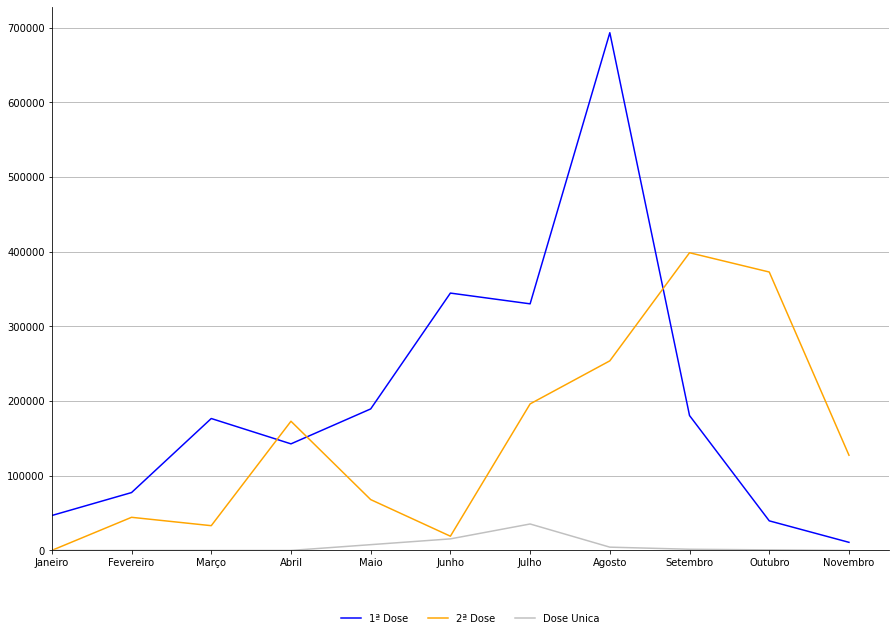

In [ ]:
# Remo linha externa de cima
plt.rcParams['axes.spines.top'] = False
# Remo linha externa da direita
plt.rcParams['axes.spines.right'] = False


plt.figure(figsize=(15,10))

#plot
plt.plot('mes', 'QUANTIDADE', data=df_graf1_dose_1, linestyle='-', marker='', color='blue')
plt.plot('mes', 'QUANTIDADE', data=df_graf1_dose_2, linestyle='-', marker='', color='orange')
plt.plot('mes', 'QUANTIDADE', data=df_graf1_dose_u, linestyle='-', marker='', color='silver')
# Remove as grades do gráfico
plt.grid(axis='y')

# Define a legenda
plt.legend(['1ª Dose', '2ª Dose', 'Dose Unica'], frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

# Define o ponto de início no eixo y
plt.ylim(ymin=0) 
# Define o ponto de início no eixo x
plt.xlim(xmin=0) 



# Salva a figura na pasta, com o nome grafico_1.png
plt.savefig("graficos/grafico_1.png")

# Define o tamanho da imagem no documento
grafico_1 = InlineImage(doc, os.path.join( "graficos/grafico_1.png"),width=Mm(150), height=Mm(100))


plt.show()

# Gráfico 2

In [ ]:
# Cria uma planilha com os dados do gráfico 1, unindo os registros por mes e descrição das does
df_graf2 = df.groupby(['mes', 'vacina_descricao_dose', 'paciente_enumsexobiologico']).size().reset_index().rename(columns={0: 'QUANTIDADE'}).sort_values(by=['mes']).reset_index(drop=True)


## Gráfico 2 dose 1

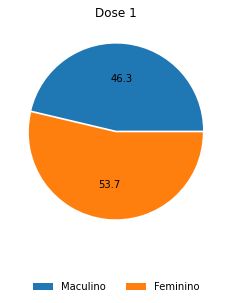

In [ ]:

# Gria a planilha para as doses 1 do gráfico
df_graf2_dose_1 = df_graf2.loc[df_graf2['vacina_descricao_dose'] == '1ª Dose']
# Determina a quantidade de doses 1
qtd_graf2_dose_1 = sum(list(df_graf2_dose_1['QUANTIDADE']))

# Determina a quantidade de doses 1 aplicada no sexo F
graf2_dose_1_f = sum(list(df_graf2_dose_1.loc[df_graf2_dose_1['paciente_enumsexobiologico'] == 'F']['QUANTIDADE']))
# Determina a porcentagem de doses 1 aplicada no sexo F
porc_graf2_dose_1_f = round(graf2_dose_1_f * 100/ qtd_graf2_dose_1 ,1)

# Determina a quantidade de doses 1 aplicada no sexo M
graf2_dose_1_m = sum(list(df_graf2_dose_1.loc[df_graf2_dose_1['paciente_enumsexobiologico'] == 'M']['QUANTIDADE']))
# Determina a porcentagem de doses 1 aplicada no sexo F
porc_graf2_dose_1_m = round(graf2_dose_1_m * 100/ qtd_graf2_dose_1 ,1)





plt.figure()

# Define os valores para o gráfico
values = [porc_graf2_dose_1_m, porc_graf2_dose_1_f] 

# Cria o gráfico
plt.pie(values, autopct='%.1f', explode=(0.01, 0.01))

# Define a legenda
legenda = ['Maculino', 'Feminino']
plt.legend(legenda, frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

# Define o título          
plt.title('Dose 1')

# Salva a figura na pasta, com o nome grafico_1.png
plt.savefig("graficos/grafico_2_1.png")

# Define o tamanho da imagem no documento
grafico_2_1 = InlineImage(doc, os.path.join( "graficos/grafico_2_1.png"),width=Mm(40), height=Mm(40))

plt.show()

## Gráfico 2 Dose 2

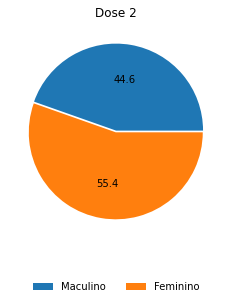

In [ ]:
# Gria a planilha para as doses 2 do gráfico
df_graf2_dose_2 = df_graf2.loc[df_graf2['vacina_descricao_dose'] == '2ª Dose']
# Determina a quantidade de doses 2
qtd_graf2_dose_2 = sum(list(df_graf2_dose_2['QUANTIDADE']))

# Determina a quantidade de doses 2 aplicada no sexo F
graf2_dose_2_f = sum(list(df_graf2_dose_2.loc[df_graf2_dose_2['paciente_enumsexobiologico'] == 'F']['QUANTIDADE']))
# Determina a porcentagem de doses 2 aplicada no sexo F
porc_graf2_dose_2_f = round(graf2_dose_2_f * 100/ qtd_graf2_dose_2 ,1)

# Determina a quantidade de doses 2 aplicada no sexo M
graf2_dose_2_m = sum(list(df_graf2_dose_2.loc[df_graf2_dose_2['paciente_enumsexobiologico'] == 'M']['QUANTIDADE']))
# Determina a porcentagem de doses 2 aplicada no sexo F
porc_graf2_dose_2_m = round(graf2_dose_2_m * 100/ qtd_graf2_dose_2 ,1)





plt.figure()

# Define os valores para o gráfico
values = [porc_graf2_dose_2_m, porc_graf2_dose_2_f] 

# Cria o gráfico
plt.pie(values, autopct='%.1f', explode=(0.01, 0.01))

# Define a legenda
legenda = ['Maculino', 'Feminino']
plt.legend(legenda, frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

# Define o título          
plt.title('Dose 2')

# Salva a figura na pasta, com o nome grafico_1.png
plt.savefig("graficos/grafico_2_2.png")

# Define o tamanho da imagem no documento
grafico_2_2 = InlineImage(doc, os.path.join( "graficos/grafico_2_2.png"),width=Mm(40), height=Mm(40))

plt.show()

# Gráfico 2 Dose única

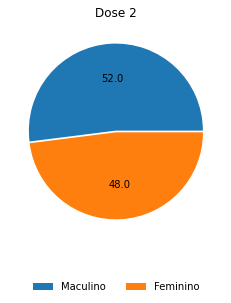

In [ ]:
# Cria uma planilha com os dados do gráfico 2 para dose unica, unindo os registros por mes e vacina_nome
df_graf2_u = df.groupby(['mes', 'vacina_nome','paciente_enumsexobiologico']).size().reset_index().rename(columns={0: 'QUANTIDADE'}).sort_values(by=['mes']).reset_index(drop=True)

# Gria a planilha para as doses 2 do gráfico
df_graf2_dose_u = df_graf2_u.loc[df_graf2_u['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S']
# Determina a quantidade de doses 2
qtd_graf2_dose_u = sum(list(df_graf2_dose_u['QUANTIDADE']))

# Determina a quantidade de doses 2 aplicada no sexo F
graf2_dose_u_f = sum(list(df_graf2_dose_u.loc[df_graf2_dose_u['paciente_enumsexobiologico'] == 'F']['QUANTIDADE']))
# Determina a porcentagem de doses 2 aplicada no sexo F
porc_graf2_dose_u_f = round(graf2_dose_u_f * 100/ qtd_graf2_dose_u ,1)

# Determina a quantidade de doses 2 aplicada no sexo M
graf2_dose_u_m = sum(list(df_graf2_dose_u.loc[df_graf2_dose_u['paciente_enumsexobiologico'] == 'M']['QUANTIDADE']))
# Determina a porcentagem de doses 2 aplicada no sexo F
porc_graf2_dose_u_m = round(graf2_dose_u_m * 100/ qtd_graf2_dose_u ,1)





plt.figure()

# Define os valores para o gráfico
values = [porc_graf2_dose_u_m, porc_graf2_dose_u_f] 

# Cria o gráfico
plt.pie(values, autopct='%.1f', explode=(0.01, 0.01))

# Define a legenda
legenda = ['Maculino', 'Feminino']
plt.legend(legenda, frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

# Define o título          
plt.title('Dose 2')

# Salva a figura na pasta, com o nome grafico_1.png
plt.savefig("graficos/grafico_2_u.png")

# Define o tamanho da imagem no documento
grafico_2_u = InlineImage(doc, os.path.join( "graficos/grafico_2_u.png"),width=Mm(40), height=Mm(40))

plt.show()

# Gráfico 3

In [22]:
'''g3_ra = []
g3_d1 = []
g3_d2 = []
g3_du = []

for x in df.loc[df['paciente_endereco_uf'] != 'DF']['paciente_endereco_uf'].unique():

    g3_ra.append(x)
    g3_d1.append(df.loc[(df['paciente_endereco_uf'] == x) & (df['vacina_descricao_dose'] == '1ª\xa0Dose')].shape[0])
    g3_d2.append(df.loc[(df['paciente_endereco_uf'] == x) & (df['vacina_descricao_dose'] == '2ª\xa0Dose')].shape[0])
    g3_du.append(df.loc[(df['paciente_endereco_uf'] == x) & (df['vacina_nome'] == 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag')].shape[0])
    



g3_tot1 = df.loc[(df['paciente_endereco_uf'] != 'DF') & (df['vacina_descricao_dose'] == '1ª\xa0Dose')].shape[0]
g3_tot2 = df.loc[(df['paciente_endereco_uf'] != 'DF') & (df['vacina_descricao_dose'] == '2ª\xa0Dose')].shape[0]
g3_totu = df.loc[(df['paciente_endereco_uf'] != 'DF') & (df['vacina_nome'] == 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag')].shape[0]

g3_tot = [g3_tot1, g3_tot2, g3_totu]

dfg3 = pd.DataFrame(list(zip(g3_ra, g3_d1, g3_d2, g3_du, )),
               columns =['RA', 'D1', 'D2', 'DU'])

dfg3 = dfg3.T'''

# categoria de vacina

In [ ]:
trab_saude = [
    'Técnico de Enfermagem',
    'Enfermeiro(a)',
    'Médico',
    'Biomédico',
    'Auxiliar de Enfermagem',
    'Doula/Parteira',
    'Motorista de Ambulância'
]

comorbidades = [
    'Hipertensão de difícil controle ou com complicações/lesão de órgão alvo',
    'Pessoas de 80 anos ou mais',
    'Doenças Cardiovasculares e Cerebrovasculares',
    'Gestante',
    'Pessoas de 75 a 79 anos',
    'Diabetes Mellitus',
    'Pessoas de 65 a 69 anos',
    'Pessoas de 70 a 74 anos',
    'Neoplasias',
    'Outros Imunocomprometidos',
    'Pneumopatias Crônicas Graves',
    'Doença neurológica crônica',
    'Obesidade Grave (Imc≥40)',
    'Pessoas de 60 nos ou mais Institucionalizadas',
    'Puérpera',
    'Doença cardiovascular',
    'Cirrose hepática',
    'Pessoas com Deficiência Institucionalizadas',
    'Síndrome de Down',
    'Hemoglobinopatia grave',
    'Indivíduos Transplantados de Medula Óssea'
]

forc_arma = [
    'Exército Brasileiro - EB',
    'Força Aérea Brasileira - FAB',
    'Marinha do Brasil - MB',
]

seg_salv = [
    'Policial Civil',
    'Policial Militar'
    'Policial Rodoviário Federal',
    'Policial Federal',
    'Guarda Municipal',
    'Bombeiro Civil',
    'Bombeiro Militar',
    'Segurança'
]

func_priv_li = ['Funcionário do Sistema de Privação de Liberdade']


deficientes = [
    'Pessoas com Deficiência Permanente',
    'Pessoas com Deficiência Institucionalizadas',
    'Síndrome de Down'
]


mais_60_inst = ['Pessoas de 60 nos ou mais Institucionalizadas']

rua = ['Pessoas em Situação de Rua']

priv_lib = ['População Privada de Liberdade']

indi = ['Povos indígenas em terras indígenas']

transporte = [
    'Caminhoneiro',
    'Trabalhadores Portuários',
    'Metroviário',
    'Coletivo Rodoviário Passageiros Urbano e de Longo Curso',
    'Ferroviário',
    'Aquaviário'
]


limp = ['Trabalhadores de limpeza urbana e manejo de resíduos sólidos']



gest = ['Gestante']

pue = ['Puérpera']

list_cat = [trab_saude, comorbidades, forc_arma, seg_salv, func_priv_li, deficientes, mais_60_inst, rua, priv_lib, indi, transporte, limp, gest, pue]


# Tabela 3

In [ ]:
lista_ra = ['Central', 'Centro-Sul', 'Leste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']

t3_c1 = []
val_t3_c1 = []

t3_c2 = []
val_t3_c2 = []

t3_c3 = []
val_t3_c3 = []

t3_c4 = []
val_t3_c4 = []

t3_c5 = []
val_t3_c5 = []

t3_c6 = []
val_t3_c6 = []

t3_c7 = []
val_t3_c7 = []

t3_c8 = []
val_t3_c8 = []

t3_c9 = []
val_t3_c9 = []

t3_c10 = []
val_t3_c10 = []

t3_c11 = []
val_t3_c11 = []

t3_c12 = []
val_t3_c12 = []

t3_c13 = []
val_t3_c13 = []

t3_c14 = []
val_t3_c14 = []

t3_c15 = []
val_t3_c15 = []

# Cria uma lista com as listas de valores
tab3_list_val = [
val_t3_c1,
val_t3_c2,
val_t3_c3,
val_t3_c4,
val_t3_c5,
val_t3_c6,
val_t3_c7,
val_t3_c8,
val_t3_c9,
val_t3_c10,
val_t3_c11,
val_t3_c12,
val_t3_c13,
val_t3_c14
]

for x in range(0, 7):
    t3_c1.append('t3c1_'+str(x))
    t3_c2.append('t3c2_'+str(x))
    t3_c3.append('t3c3_'+str(x))
    t3_c4.append('t3c4_'+str(x))
    t3_c5.append('t3c5_'+str(x))
    t3_c6.append('t3c6_'+str(x))
    t3_c7.append('t3c7_'+str(x))
    t3_c8.append('t3c8_'+str(x))
    t3_c9.append('t3c9_'+str(x))
    t3_c10.append('t3c10_'+str(x))
    t3_c11.append('t3c11_'+str(x))
    t3_c12.append('t3c12_'+str(x))
    t3_c13.append('t3c13_'+str(x))
    t3_c14.append('t3c14_'+str(x))
    t3_c15.append('t3c15_'+str(x))

    for y in range(0, 14):
        tab3_list_val[y].append(df.loc[(df['vacina_grupoatendimento_nome'].isin(list_cat[y])) & (df['RA'] == lista_ra[x]) & (df['vacina_descricao_dose'] == '1ª Dose')].shape[0])


for x in range(0, 14):
    tab3_list_val[x].append(sum(tab3_list_val[x]))

t3_c1.append('t3c1_7')
t3_c2.append('t3c2_7')
t3_c3.append('t3c3_7')
t3_c4.append('t3c4_7')
t3_c5.append('t3c5_7')
t3_c6.append('t3c6_7')
t3_c7.append('t3c7_7')
t3_c8.append('t3c8_7')
t3_c9.append('t3c9_7')
t3_c10.append('t3c10_7')
t3_c11.append('t3c11_7')
t3_c12.append('t3c12_7')
t3_c13.append('t3c13_7')
t3_c14.append('t3c14_7')
t3_c15.append('t3c15_7')


for x in range(0, 8):
    soma = []
    for y in tab3_list_val:
        soma.append(y[x])
        
    val_t3_c15.append(sum(soma))
    


dic_tab3_c1 = dict(zip(t3_c1, val_t3_c1))
dic_tab3_c2 = dict(zip(t3_c2, val_t3_c2))
dic_tab3_c3 = dict(zip(t3_c3, val_t3_c3))
dic_tab3_c4 = dict(zip(t3_c4, val_t3_c4))
dic_tab3_c5 = dict(zip(t3_c5, val_t3_c5))
dic_tab3_c6 = dict(zip(t3_c6, val_t3_c6))
dic_tab3_c7 = dict(zip(t3_c7, val_t3_c7))
dic_tab3_c8 = dict(zip(t3_c8, val_t3_c8))
dic_tab3_c9 = dict(zip(t3_c9, val_t3_c9))
dic_tab3_c10 = dict(zip(t3_c10, val_t3_c10))
dic_tab3_c11 = dict(zip(t3_c11, val_t3_c11))
dic_tab3_c12 = dict(zip(t3_c12, val_t3_c12))
dic_tab3_c13 = dict(zip(t3_c13, val_t3_c13))
dic_tab3_c14 = dict(zip(t3_c14, val_t3_c14))
dic_tab3_c15 = dict(zip(t3_c15, val_t3_c15))

tab3 = {**dic_tab3_c1, **dic_tab3_c2,**dic_tab3_c3,**dic_tab3_c4,**dic_tab3_c5,**dic_tab3_c6,**dic_tab3_c7,**dic_tab3_c8,**dic_tab3_c9,**dic_tab3_c10,**dic_tab3_c11,**dic_tab3_c12,**dic_tab3_c13,**dic_tab3_c14,**dic_tab3_c15}

# Tabela 4

In [ ]:
lista_ra = ['Central', 'Centro-Sul', 'Leste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']

t4_c1 = []
val_t4_c1 = []

t4_c2 = []
val_t4_c2 = []

t4_c3 = []
val_t4_c3 = []

t4_c4 = []
val_t4_c4 = []

t4_c5 = []
val_t4_c5 = []

t4_c6 = []
val_t4_c6 = []

t4_c7 = []
val_t4_c7 = []

t4_c8 = []
val_t4_c8 = []

t4_c9 = []
val_t4_c9 = []

t4_c10 = []
val_t4_c10 = []

t4_c11 = []
val_t4_c11 = []

t4_c12 = []
val_t4_c12 = []

t4_c13 = []
val_t4_c13 = []

t4_c14 = []
val_t4_c14 = []

t4_c15 = []
val_t4_c15 = []

# Cria uma lista com as listas de valores
tab4_list_val = [
val_t4_c1,
val_t4_c2,
val_t4_c3,
val_t4_c4,
val_t4_c5,
val_t4_c6,
val_t4_c7,
val_t4_c8,
val_t4_c9,
val_t4_c10,
val_t4_c11,
val_t4_c12,
val_t4_c13,
val_t4_c14
]

for x in range(0, 7):
    t4_c1.append('t4c1_'+str(x))
    t4_c2.append('t4c2_'+str(x))
    t4_c3.append('t4c3_'+str(x))
    t4_c4.append('t4c4_'+str(x))
    t4_c5.append('t4c5_'+str(x))
    t4_c6.append('t4c6_'+str(x))
    t4_c7.append('t4c7_'+str(x))
    t4_c8.append('t4c8_'+str(x))
    t4_c9.append('t4c9_'+str(x))
    t4_c10.append('t4c10_'+str(x))
    t4_c11.append('t4c11_'+str(x))
    t4_c12.append('t4c12_'+str(x))
    t4_c13.append('t4c13_'+str(x))
    t4_c14.append('t4c14_'+str(x))
    t4_c15.append('t4c15_'+str(x))

    for y in range(0, 14):
        tab4_list_val[y].append(df.loc[(df['vacina_grupoatendimento_nome'].isin(list_cat[y])) & (df['RA'] == lista_ra[x]) & (df['vacina_descricao_dose'] == '1ª Dose')].shape[0])


for x in range(0, 14):
    tab4_list_val[x].append(sum(tab4_list_val[x]))

t4_c1.append('t4c1_7')
t4_c2.append('t4c2_7')
t4_c3.append('t4c3_7')
t4_c4.append('t4c4_7')
t4_c5.append('t4c5_7')
t4_c6.append('t4c6_7')
t4_c7.append('t4c7_7')
t4_c8.append('t4c8_7')
t4_c9.append('t4c9_7')
t4_c10.append('t4c10_7')
t4_c11.append('t4c11_7')
t4_c12.append('t4c12_7')
t4_c13.append('t4c13_7')
t4_c14.append('t4c14_7')
t4_c15.append('t4c15_7')


for x in range(0, 8):
    soma = []
    for y in tab4_list_val:
        soma.append(y[x])
        
    val_t4_c15.append(sum(soma))
    


dic_tab4_c1 = dict(zip(t4_c1, val_t4_c1))
dic_tab4_c2 = dict(zip(t4_c2, val_t4_c2))
dic_tab4_c3 = dict(zip(t4_c3, val_t4_c3))
dic_tab4_c4 = dict(zip(t4_c4, val_t4_c4))
dic_tab4_c5 = dict(zip(t4_c5, val_t4_c5))
dic_tab4_c6 = dict(zip(t4_c6, val_t4_c6))
dic_tab4_c7 = dict(zip(t4_c7, val_t4_c7))
dic_tab4_c8 = dict(zip(t4_c8, val_t4_c8))
dic_tab4_c9 = dict(zip(t4_c9, val_t4_c9))
dic_tab4_c10 = dict(zip(t4_c10, val_t4_c10))
dic_tab4_c11 = dict(zip(t4_c11, val_t4_c11))
dic_tab4_c12 = dict(zip(t4_c12, val_t4_c12))
dic_tab4_c13 = dict(zip(t4_c13, val_t4_c13))
dic_tab4_c14 = dict(zip(t4_c14, val_t4_c14))
dic_tab4_c15 = dict(zip(t4_c15, val_t4_c15))

tab4 = {**dic_tab4_c1, **dic_tab4_c2,**dic_tab4_c3,**dic_tab4_c4,**dic_tab4_c5,**dic_tab4_c6,**dic_tab4_c7,**dic_tab4_c8,**dic_tab4_c9,**dic_tab4_c10,**dic_tab4_c11,**dic_tab4_c12,**dic_tab4_c13,**dic_tab4_c14,**dic_tab4_c15}

# Tabela 5

In [ ]:
lista_ra = ['Central', 'Centro-Sul', 'Leste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']

t5_c1 = []
val_t5_c1 = []

t5_c2 = []
val_t5_c2 = []

t5_c3 = []
val_t5_c3 = []

t5_c4 = []
val_t5_c4 = []

t5_c5 = []
val_t5_c5 = []

t5_c6 = []
val_t5_c6 = []

t5_c7 = []
val_t5_c7 = []

t5_c8 = []
val_t5_c8 = []

t5_c9 = []
val_t5_c9 = []

t5_c10 = []
val_t5_c10 = []

t5_c11 = []
val_t5_c11 = []

t5_c12 = []
val_t5_c12 = []

t5_c13 = []
val_t5_c13 = []

t5_c14 = []
val_t5_c14 = []

t5_c15 = []
val_t5_c15 = []

# Cria uma lista com as listas de valores
tab_list_val = [
val_t5_c1,
val_t5_c2,
val_t5_c3,
val_t5_c4,
val_t5_c5,
val_t5_c6,
val_t5_c7,
val_t5_c8,
val_t5_c9,
val_t5_c10,
val_t5_c11,
val_t5_c12,
val_t5_c13,
val_t5_c14
]

for x in range(0, 7):
    t5_c1.append('t5c1_'+str(x))
    t5_c2.append('t5c2_'+str(x))
    t5_c3.append('t5c3_'+str(x))
    t5_c4.append('t5c4_'+str(x))
    t5_c5.append('t5c5_'+str(x))
    t5_c6.append('t5c6_'+str(x))
    t5_c7.append('t5c7_'+str(x))
    t5_c8.append('t5c8_'+str(x))
    t5_c9.append('t5c9_'+str(x))
    t5_c10.append('t5c10_'+str(x))
    t5_c11.append('t5c11_'+str(x))
    t5_c12.append('t5c12_'+str(x))
    t5_c13.append('t5c13_'+str(x))
    t5_c14.append('t5c14_'+str(x))
    t5_c15.append('t5c15_'+str(x))

    for y in range(0, 14):
        tab_list_val[y].append(df.loc[(df['vacina_grupoatendimento_nome'].isin(list_cat[y])) & (df['RA'] == lista_ra[x]) & (df['vacina_nome'] == 'COVID-19 JANSSEN - Ad26.COV2.S')].shape[0])


for x in range(0, 14):
    tab_list_val[x].append(sum(tab_list_val[x]))

t5_c1.append('t5c1_7')
t5_c2.append('t5c2_7')
t5_c3.append('t5c3_7')
t5_c4.append('t5c4_7')
t5_c5.append('t5c5_7')
t5_c6.append('t5c6_7')
t5_c7.append('t5c7_7')
t5_c8.append('t5c8_7')
t5_c9.append('t5c9_7')
t5_c10.append('t5c10_7')
t5_c11.append('t5c11_7')
t5_c12.append('t5c12_7')
t5_c13.append('t5c13_7')
t5_c14.append('t5c14_7')
t5_c15.append('t5c15_7')


for x in range(0, 8):
    soma = []
    for y in tab_list_val:
        soma.append(y[x])
        
    val_t5_c15.append(sum(soma))
    


dic_tab5_c1 = dict(zip(t5_c1, val_t5_c1))
dic_tab5_c2 = dict(zip(t5_c2, val_t5_c2))
dic_tab5_c3 = dict(zip(t5_c3, val_t5_c3))
dic_tab5_c4 = dict(zip(t5_c4, val_t5_c4))
dic_tab5_c5 = dict(zip(t5_c5, val_t5_c5))
dic_tab5_c6 = dict(zip(t5_c6, val_t5_c6))
dic_tab5_c7 = dict(zip(t5_c7, val_t5_c7))
dic_tab5_c8 = dict(zip(t5_c8, val_t5_c8))
dic_tab5_c9 = dict(zip(t5_c9, val_t5_c9))
dic_tab5_c10 = dict(zip(t5_c10, val_t5_c10))
dic_tab5_c11 = dict(zip(t5_c11, val_t5_c11))
dic_tab5_c12 = dict(zip(t5_c12, val_t5_c12))
dic_tab5_c13 = dict(zip(t5_c13, val_t5_c13))
dic_tab5_c14 = dict(zip(t5_c14, val_t5_c14))
dic_tab5_c15 = dict(zip(t5_c15, val_t5_c15))

tab5 = {**dic_tab5_c1, **dic_tab5_c2,**dic_tab5_c3,**dic_tab5_c4,**dic_tab5_c5,**dic_tab5_c6,**dic_tab5_c7,**dic_tab5_c8,**dic_tab5_c9,**dic_tab5_c10,**dic_tab5_c11,**dic_tab5_c12,**dic_tab5_c13,**dic_tab5_c14,**dic_tab5_c15}

# Dicionários

In [ ]:
graficos = {
'grafico_1' : grafico_1,
'grafico_2_1' : grafico_2_1,
'grafico_2_2' : grafico_2_2,
'grafico_2_u' : grafico_2_u,
}

valores = {**dic_doses, **dic_datas, **doses_aplicadas, **tab2, **tab3, **tab4, **tab5, **graficos}

In [ ]:
# Renderizar os valores nas chaves
doc.render(valores)

# Salvar arquivo boletim_automatizado.docx
doc.save('boletim_automatizado.docx')